In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pingouin as pg

#datafile = '\\Users\\sarac\\OneDrive\\Documenti\\Magistrale_tn\\GeneEnv_Analysis\\dataset.csv'
datafile = '/home/bizzego/UniTn/data/GxE_Cataldo/dataset.csv'

/opt/bizzego/miniconda3/envs/work/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/opt/bizzego/miniconda3/envs/work/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
TARGET = 'RRmean_normStimuli'

In [3]:
data = pd.read_csv(datafile)
data.dropna(axis=0, inplace=True)

In [4]:
N_sub = len(data['subject'].unique())

In [5]:
data['vuln_98'] = 0 
data.loc[(data['rs2254298'] == 'AA')|
         (data['rs2254298'] == 'GA'),
         'vuln_98'] = 1 

<AxesSubplot:>

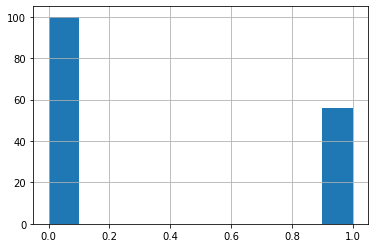

In [6]:
data['vuln_98'].hist()

#### Is HRV normal? --> NO

                           W      pval  normal
RRmean_normStimuli  0.959066  0.000146   False


<AxesSubplot:title={'center':'RRmean_normStimuli'}, xlabel='label'>

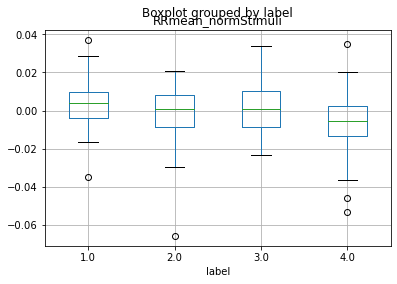

In [7]:
results_normality = pg.normality(data[TARGET])
print(results_normality)
data.boxplot(TARGET, by='label')

#### does HRV depend on the stimulus? --> YES

In [8]:
#kruskal because not normal
pg.kruskal(data, dv=TARGET, between='label')

Source  ddof1         H     p-unc
Kruskal  label      3  9.722848  0.021075

post-hoc here ...

### Gene x Env (for each type of stimulus)

In [9]:
genes = ['vuln_98']
envs = ['PBI_M_care',
        'PBI_M_overp',
        'PBI_F_care',
        'PBI_F_overp']

#### CAT CRY (label = 1)

In [10]:
data_label = data.query('label == 1')
for gene_col in genes:
    for env_col in envs:
        formula = f'{TARGET} ~ C({gene_col}) + {env_col} + C({gene_col})*{env_col}'
        model = smf.ols(formula=formula, data=data_label).fit()
        print('\n')
        print(f'{gene_col} x {env_col}')
        print(model.summary())
        print(pg.normality(model.resid))



vuln_98 x PBI_M_care
                            OLS Regression Results                            
Dep. Variable:     RRmean_normStimuli   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.003
Date:                Mon, 06 Sep 2021   Prob (F-statistic):              0.403
Time:                        10:49:28   Log-Likelihood:                 114.51
No. Observations:                  39   AIC:                            -221.0
Df Residuals:                      35   BIC:                            -214.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

#### 3MO CRY (label = 2)

In [11]:
data_label = data.query('label == 2')
for gene_col in genes:
    for env_col in envs:
        formula = f'{TARGET} ~ C({gene_col}) + {env_col} + C({gene_col})*{env_col}'
        model = smf.ols(formula=formula, data=data_label).fit()
        print('\n')
        print(f'{gene_col} x {env_col}')
        print(model.summary())
        print(pg.normality(model.resid))



vuln_98 x PBI_M_care
                            OLS Regression Results                            
Dep. Variable:     RRmean_normStimuli   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.6374
Date:                Mon, 06 Sep 2021   Prob (F-statistic):              0.596
Time:                        10:49:58   Log-Likelihood:                 108.89
No. Observations:                  39   AIC:                            -209.8
Df Residuals:                      35   BIC:                            -203.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

#### 12MO LAUGH (label = 3)

In [12]:
data_label = data.query('label == 3')
for gene_col in genes:
    for env_col in envs:
        formula = f'{TARGET} ~ C({gene_col}) + {env_col} + C({gene_col})*{env_col}'
        model = smf.ols(formula=formula, data=data_label).fit()
        print('\n')
        print(f'{gene_col} x {env_col}')
        print(model.summary())
        print(pg.normality(model.resid))



vuln_98 x PBI_M_care
                            OLS Regression Results                            
Dep. Variable:     RRmean_normStimuli   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.5506
Date:                Mon, 06 Sep 2021   Prob (F-statistic):              0.651
Time:                        10:50:10   Log-Likelihood:                 114.38
No. Observations:                  39   AIC:                            -220.8
Df Residuals:                      35   BIC:                            -214.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

#### WOMAN CRY (label = 4)

In [13]:
data_label = data.query('label == 4')
for gene_col in genes:
    for env_col in envs:
        formula = f'{TARGET} ~ C({gene_col}) + {env_col} + C({gene_col})*{env_col}'
        model = smf.ols(formula=formula, data=data_label).fit()
        print('\n')
        print(f'{gene_col} x {env_col}')
        print(model.summary())
        print(pg.normality(model.resid))



vuln_98 x PBI_M_care
                            OLS Regression Results                            
Dep. Variable:     RRmean_normStimuli   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.077
Method:                 Least Squares   F-statistic:                   0.09615
Date:                Mon, 06 Sep 2021   Prob (F-statistic):              0.962
Time:                        10:50:28   Log-Likelihood:                 104.50
No. Observations:                  39   AIC:                            -201.0
Df Residuals:                      35   BIC:                            -194.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

### SHOW data for significant results



vuln_98 x PBI_M_overp
                            OLS Regression Results                            
Dep. Variable:     RRmean_normStimuli   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     2.977
Date:                Mon, 06 Sep 2021   Prob (F-statistic):             0.0447
Time:                        11:07:01   Log-Likelihood:                 117.33
No. Observations:                  39   AIC:                            -226.7
Df Residuals:                      35   BIC:                            -220.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

Text(0, 0.5, 'RRmean_normStimuli')

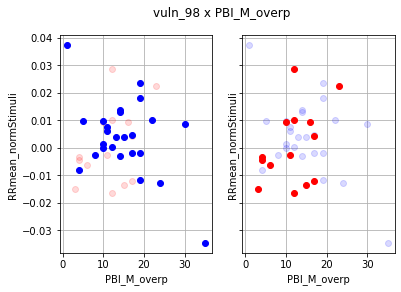

In [20]:
#%% Significant results>>>
label = 1
data_label = data.query('label == @label')

gene_col = 'vuln_98'
env_col = 'PBI_M_overp'

data_nonvuln = data_label.query(f'{gene_col} == 0 ')
data_vuln = data_label.query(f'{gene_col} == 1 ')

formula = f'{TARGET} ~ C({gene_col}) + {env_col} + C({gene_col})*{env_col}'
model = smf.ols(formula=formula, data=data_label).fit()
print('\n')
print(f'{gene_col} x {env_col}')
print(model.summary())

f, axes = plt.subplots(1,2, sharex=True, sharey=True)

f.suptitle(f'{gene_col} x {env_col}')

print(pg.corr(data_nonvuln[env_col], data_nonvuln[TARGET], method='spearman'))
print(pg.corr(data_vuln[env_col], data_vuln[TARGET], method='spearman'))

plt.sca(axes[0])
plt.plot(data_vuln[env_col], data_vuln[TARGET], 'or', alpha=0.15)
plt.plot(data_nonvuln[env_col], data_nonvuln[TARGET], 'ob')
plt.grid(True)
plt.xlabel(env_col)
plt.ylabel(TARGET)

plt.sca(axes[1])
plt.plot(data_nonvuln[env_col], data_nonvuln[TARGET], 'ob', alpha=0.15)
plt.plot(data_vuln[env_col], data_vuln[TARGET], 'or')
plt.grid(True)
plt.xlabel(env_col)
plt.ylabel(TARGET)

In [16]:
pg.ancova(data_label, dv=TARGET, between=gene_col, covar=env_col)

Source        SS  DF         F     p-unc       np2
0      vuln_98  0.000162   1  0.880516  0.354314  0.023875
1  PBI_M_overp  0.000277   1  1.508360  0.227359  0.040214
2     Residual  0.006622  36       NaN       NaN       NaN



vuln_98 x PBI_F_overp
                            OLS Regression Results                            
Dep. Variable:     RRmean_normStimuli   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     3.141
Date:                Mon, 06 Sep 2021   Prob (F-statistic):             0.0374
Time:                        11:00:34   Log-Likelihood:                 117.55
No. Observations:                  39   AIC:                            -227.1
Df Residuals:                      35   BIC:                            -220.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

Text(0, 0.5, 'RRmean_normStimuli')

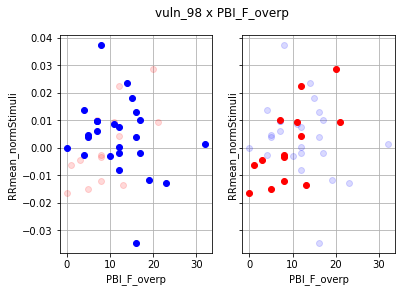

In [17]:
#%% Significant results>>>
label = 1
data_label = data.query('label == @label')

gene_col = 'vuln_98'
env_col = 'PBI_F_overp'

data_nonvuln = data_label.query(f'{gene_col} == 0 ')
data_vuln = data_label.query(f'{gene_col} == 1 ')

formula = f'{TARGET} ~ C({gene_col}) + {env_col} + C({gene_col})*{env_col}'
model = smf.ols(formula=formula, data=data_label).fit()
print('\n')
print(f'{gene_col} x {env_col}')
print(model.summary())

print(pg.corr(data_nonvuln[env_col], data_nonvuln[TARGET], method='spearman'))
print(pg.corr(data_vuln[env_col], data_vuln[TARGET], method='spearman'))

f, axes = plt.subplots(1,2, sharex=True, sharey=True)

f.suptitle(f'{gene_col} x {env_col}')

plt.sca(axes[0])
plt.plot(data_vuln[env_col], data_vuln[TARGET], 'or', alpha=0.15)
plt.plot(data_nonvuln[env_col], data_nonvuln[TARGET], 'ob')
plt.grid(True)
plt.xlabel(env_col)
plt.ylabel(TARGET)

plt.sca(axes[1])
plt.plot(data_nonvuln[env_col], data_nonvuln[TARGET], 'ob', alpha=0.15)
plt.plot(data_vuln[env_col], data_vuln[TARGET], 'or')
plt.grid(True)
plt.xlabel(env_col)
plt.ylabel(TARGET)



vuln_98 x PBI_F_overp
                            OLS Regression Results                            
Dep. Variable:     RRmean_normStimuli   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     3.741
Date:                Mon, 06 Sep 2021   Prob (F-statistic):             0.0197
Time:                        11:02:39   Log-Likelihood:                 109.76
No. Observations:                  39   AIC:                            -211.5
Df Residuals:                      35   BIC:                            -204.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

Text(0, 0.5, 'RRmean_normStimuli')

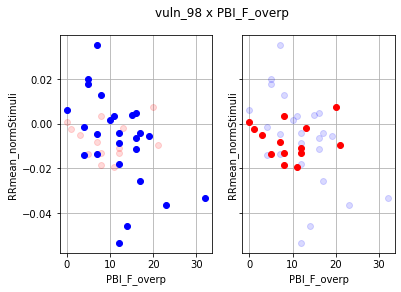

In [18]:
#%% Significant results>>>
label = 4
data_label = data.query('label == @label')

gene_col = 'vuln_98'
env_col = 'PBI_F_overp'

data_nonvuln = data_label.query(f'{gene_col} == 0 ')
data_vuln = data_label.query(f'{gene_col} == 1 ')

formula = f'{TARGET} ~ C({gene_col}) + {env_col} + C({gene_col})*{env_col}'
model = smf.ols(formula=formula, data=data_label).fit()
print('\n')
print(f'{gene_col} x {env_col}')
print(model.summary())

print(pg.corr(data_nonvuln[env_col], data_nonvuln[TARGET], method='spearman'))
print(pg.corr(data_vuln[env_col], data_vuln[TARGET], method='spearman'))

f, axes = plt.subplots(1,2, sharex=True, sharey=True)

f.suptitle(f'{gene_col} x {env_col}')

plt.sca(axes[0])
plt.plot(data_vuln[env_col], data_vuln[TARGET], 'or', alpha=0.15)
plt.plot(data_nonvuln[env_col], data_nonvuln[TARGET], 'ob')
plt.grid(True)
plt.xlabel(env_col)
plt.ylabel(TARGET)

plt.sca(axes[1])
plt.plot(data_nonvuln[env_col], data_nonvuln[TARGET], 'ob', alpha=0.15)
plt.plot(data_vuln[env_col], data_vuln[TARGET], 'or')
plt.grid(True)
plt.xlabel(env_col)
plt.ylabel(TARGET)